Hugo Dubois 195347 \
Yiming Zhao 195187

# Xente Fraud Detection Challenge

The objective of our project is to be able to identify fraud based on information from different transactions. To do this, we first need to learn our model from the data in the training.csv file in order to conclude whether there is fraud based on the information provided in test.csv. 

we have the following columns in the files provided:
- TransactionId: ID number for each transaction
- BatchId: ID number for each batch of transactions
- AccountId: ID number for each account
- SubscriptionId: ID number for each customer subscription
- CustomerId: each customer has a unique identifier
- CurrencyCode: Currency of the country
- CountryCode: Geographic numeric country code
- ProviderId: ID number for each provider
- ProductId: ID number for each product
- ProductCategory: categories of product purchased per transact
- ChannelId: ID number for each channel
- Amount: Value of the transaction, positive for debits and negative for credit
- Value: Absolute value of the transaction
- TransactionStartTime: the time at which the transaction was carried out
- PricingStrategy: the payment method for a transaction
- FraudResult: field that we try to predict for the test data, it tells us if a transaction is fraud or not fraud

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

from sklearn.ensemble import RandomForestClassifier

## Import the Datasets

In [2]:
df_train = pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")

## Basic analysis on the Datasets

In [3]:
df_train.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
df_train.shape

(95662, 16)

In [5]:
df_test.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
5,TransactionId_134338,BatchId_67575,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:03:12Z,2
6,TransactionId_109096,BatchId_52375,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:03:48Z,2
7,TransactionId_14249,BatchId_112552,AccountId_2908,SubscriptionId_2977,CustomerId_3332,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:09:46Z,1
8,TransactionId_69896,BatchId_60867,AccountId_4841,SubscriptionId_3829,CustomerId_3332,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:11:24Z,2
9,TransactionId_91468,BatchId_14721,AccountId_460,SubscriptionId_2976,CustomerId_790,UGX,256,ProviderId_3,ProductId_14,financial_services,ChannelId_3,1161.0,1161,2019-02-13T10:12:08Z,0


In [6]:
df_test.shape

(45019, 15)

Non-fraudulent samples: 95469
Fraudulent samples: 193


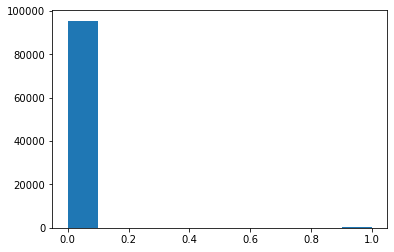

In [7]:
print("Non-fraudulent samples: {}".format(len(df_train[df_train["FraudResult"] == 0])))
print("Fraudulent samples: {}".format(len(df_train[df_train["FraudResult"] == 1])))
plt.hist(df_train["FraudResult"])
plt.show()

The dataset is heavily inbalanced, with only 0.2% of the samples being fraudulent.

## Data Preprocessing

In [8]:
df_train.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [9]:
df_train.CurrencyCode.unique()

array(['UGX'], dtype=object)

In [10]:
df_train.CountryCode.unique()

array([256], dtype=int64)

We notice that the variables CurrencyCode and CountryCode have only 1 value and can therefore be removed since they don't bring any relevant information. We also remove these variables from the test set.

In [11]:
df_train = df_train.drop(columns=['CurrencyCode', 'CountryCode'], axis=1)
df_test = df_test.drop(columns=['CurrencyCode', 'CountryCode'], axis=1)

We also can notice that all the columns that refer to id are in the following form: " nameOfTheColumn_Id ". For example:

In [12]:
identifiers = df_train.loc[:, ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId']]
identifiers

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,ChannelId_3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,ChannelId_2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,ChannelId_3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,ChannelId_3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,ChannelId_2
...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,ChannelId_2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,ChannelId_3
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,ChannelId_2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,ChannelId_3


Therefore we can remove all the irrelevent strings from these columns, and we convert these values which are originally objects to int32.

In [13]:
df_train['TransactionId'] = df_train['TransactionId'].str.replace(r'\D', '').astype(int)
df_train['BatchId'] = df_train['BatchId'].str.replace(r'\D', '').astype(int)
df_train['AccountId'] = df_train['AccountId'].str.replace(r'\D', '').astype(int)
df_train['SubscriptionId'] = df_train['SubscriptionId'].str.replace(r'\D', '').astype(int)
df_train['CustomerId'] = df_train['CustomerId'].str.replace(r'\D', '').astype(int)
df_train['ProviderId'] = df_train['ProviderId'].str.replace(r'\D', '').astype(int)
df_train['ProductId'] = df_train['ProductId'].str.replace(r'\D', '').astype(int)
df_train['ChannelId'] = df_train['ChannelId'].str.replace(r'\D', '').astype(int)

We can do the same for the df_test set as well.

In [14]:
df_test['TransactionId'] = df_test['TransactionId'].str.replace(r'\D', '').astype(int)
df_test['BatchId'] = df_test['BatchId'].str.replace(r'\D', '').astype(int)
df_test['AccountId'] = df_test['AccountId'].str.replace(r'\D', '').astype(int)
df_test['SubscriptionId'] = df_test['SubscriptionId'].str.replace(r'\D', '').astype(int)
df_test['CustomerId'] = df_test['CustomerId'].str.replace(r'\D', '').astype(int)
df_test['ProviderId'] = df_test['ProviderId'].str.replace(r'\D', '').astype(int)
df_test['ProductId'] = df_test['ProductId'].str.replace(r'\D', '').astype(int)
df_test['ChannelId'] = df_test['ChannelId'].str.replace(r'\D', '').astype(int)

In [15]:
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [16]:
df_train.dtypes

TransactionId             int32
BatchId                   int32
AccountId                 int32
SubscriptionId            int32
CustomerId                int32
ProviderId                int32
ProductId                 int32
ProductCategory          object
ChannelId                 int32
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

We see that the TransactionStartTime is of type "object" whereas it could be considered as a date or even splited into several columns. 
We therefore modify the strings describing the date and consider convert this column to 6 different columns:

- TransactionYear
- TransactionMonth
- TransactionDay
- TransactionHour
- TransactionMinute
- TransactionSecond

We do the same on the test set.

In [17]:
# Working on the training set
df_train['TransactionStartTime']=df_train['TransactionStartTime'].str.replace('T',' ')
df_train['TransactionStartTime']=df_train['TransactionStartTime'].str.replace('Z','')

# This part is to create 3 columns for the Year, the Month and the Day
TransactionDate=df_train['TransactionStartTime'].str.split(' ').str[0]
df_train['TransactionYear']=TransactionDate.str.split('-').str[0].replace(r'\D', '').astype(int)
df_train['TransactionMonth']=TransactionDate.str.split('-').str[1].replace(r'\D', '').astype(int)
df_train['TransactionDay']=TransactionDate.str.split('-').str[2].replace(r'\D', '').astype(int)


# This part is to create 3 columns for the Hour, the Minute and the Second
TransactionTime=df_train['TransactionStartTime'].str.split(' ').str[1]
df_train['TransactionHour']=TransactionTime.str.split(':').str[0].replace(r'\D', '').astype(int)
df_train['TransactionMinute']=TransactionTime.str.split(':').str[1].replace(r'\D', '').astype(int)
df_train['TransactionSeconde']=TransactionTime.str.split(':').str[2].replace(r'\D', '').astype(int)

# Working on the test set
df_test['TransactionStartTime']=df_test['TransactionStartTime'].str.replace('T',' ')
df_test['TransactionStartTime']=df_test['TransactionStartTime'].str.replace('Z','')


# This part is to create 3 columns for the Year, the Month and the Day
TransactionDate=df_test['TransactionStartTime'].str.split(' ').str[0]
df_test['TransactionYear']=TransactionDate.str.split('-').str[0].replace(r'\D', '').astype(int)
df_test['TransactionMonth']=TransactionDate.str.split('-').str[1].replace(r'\D', '').astype(int)
df_test['TransactionDay']=TransactionDate.str.split('-').str[2].replace(r'\D', '').astype(int)


# This part is to create 3 columns for the Hour, the Minute and the Second
TransactionTime=df_test['TransactionStartTime'].str.split(' ').str[1]
df_test['TransactionHour']=TransactionTime.str.split(':').str[0].replace(r'\D', '').astype(int)
df_test['TransactionMinute']=TransactionTime.str.split(':').str[1].replace(r'\D', '').astype(int)
df_test['TransactionSeconde']=TransactionTime.str.split(':').str[2].replace(r'\D', '').astype(int)

df_train.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49,2,0,2018,11,15,2,18,49
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08,2,0,2018,11,15,2,19,8
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2018-11-15 02:44:21,2,0,2018,11,15,2,44,21
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55,2,0,2018,11,15,3,32,55
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21,2,0,2018,11,15,3,34,21
5,23223,25954,1078,4238,1432,6,3,airtime,3,2000.0,2000,2018-11-15 03:35:10,2,0,2018,11,15,3,35,10
6,118063,118460,2442,1980,2858,5,3,airtime,3,10000.0,10000,2018-11-15 03:44:31,4,0,2018,11,15,3,44,31
7,100640,38561,4841,3829,2858,4,6,financial_services,2,-500.0,500,2018-11-15 03:45:13,2,0,2018,11,15,3,45,13
8,51905,93774,272,4731,598,6,10,airtime,3,500.0,500,2018-11-15 04:14:59,2,0,2018,11,15,4,14,59
9,130161,82409,710,920,1053,1,15,financial_services,3,600.0,600,2018-11-15 04:31:48,2,0,2018,11,15,4,31,48


And we can now drop the TransactionStartTime column.

In [18]:
df_train=df_train.drop(['TransactionStartTime'], axis= 1)
df_test=df_test.drop(['TransactionStartTime'], axis= 1)

In [19]:
df_train.dtypes

TransactionId           int32
BatchId                 int32
AccountId               int32
SubscriptionId          int32
CustomerId              int32
ProviderId              int32
ProductId               int32
ProductCategory        object
ChannelId               int32
Amount                float64
Value                   int64
PricingStrategy         int64
FraudResult             int64
TransactionYear         int32
TransactionMonth        int32
TransactionDay          int32
TransactionHour         int32
TransactionMinute       int32
TransactionSeconde      int32
dtype: object

## Feature Engineering

As we know feature engineering improves the performance of the machine learning model by selecting the right features for the model and preparing the features in a way that is suitable for the machine learning model. 

### Period of the year

Let's start by analysing the new 'TransactionMonth' column. If we look closely we can see that there are only 4 different months in the year when frauds are committed. This is represented below : 

In [20]:
print(df_train['TransactionMonth'].unique())

[11 12  1  2]


Now we'll get the occurrences of these values of the month to see if we can get some specific features.

In [21]:
df_train_month=df_train.loc[df_train['FraudResult'] == 1, 'TransactionMonth']
print(df_train_month.value_counts())
months_occurrences = df_train_month.value_counts()

1     64
12    62
2     53
11    14
Name: TransactionMonth, dtype: int64


We can see that there are 3 months out of 4 when the frauds are committed more often. This result is even more clear if we plot it.

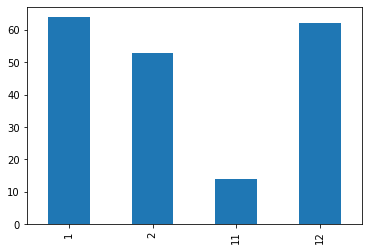

In [22]:
months_occurrences = months_occurrences.sort_index()
graph_months = months_occurrences.plot.bar()

Therefore it would be a good choice to make a feature to signal to the model that the month of the year is a target variable. Indeed, it is easy to see that the fraud are committed more often during January, February and December.
To make it usable by our model, we'll use the Ordinal encoding method. But instead of replacing the 'TransactionMonth' column, we'll just add a new one with a value of '1' if the month is January, February or December and a value of '0' instead.

In [23]:
df_train['SuspiciousMonth'] = np.where((df_train['TransactionMonth'] == 1) | (df_train['TransactionMonth'] == 2) | (df_train['TransactionMonth'] == 12), 1, 0)
df_test['SuspiciousMonth'] = np.where((df_test['TransactionMonth'] == 1) | (df_test['TransactionMonth'] == 2) | (df_test['TransactionMonth'] == 12), 1, 0)
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde,SuspiciousMonth
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2,0,2018,11,15,2,18,49,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2,0,2018,11,15,2,19,8,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2,0,2018,11,15,2,44,21,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2,0,2018,11,15,3,32,55,0
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2,0,2018,11,15,3,34,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,4,6,financial_services,2,-1000.0,1000,2,0,2019,2,13,9,54,9,1
95658,91597,3503,3439,2643,3874,6,10,airtime,3,1000.0,1000,2,0,2019,2,13,9,54,25,1
95659,82501,118602,4841,3829,3874,4,6,financial_services,2,-20.0,20,2,0,2019,2,13,9,54,35,1
95660,136354,70924,1346,652,1709,6,19,tv,3,3000.0,3000,2,0,2019,2,13,10,1,10,1


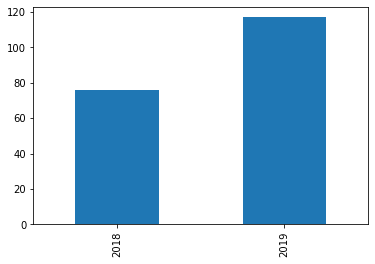

In [24]:
df_train_year=df_train.loc[df_train['FraudResult'] == 1, 'TransactionYear']
months_occurrences = df_train_year.value_counts()
months_occurrences = months_occurrences.sort_index()
graph_months = months_occurrences.plot.bar()

We can see that there are frauds for the year 2018 but also for the year 2019, the number of frauds are more or less similar (around 100 frauds per year). No useful information can be extracted from the years of transation.

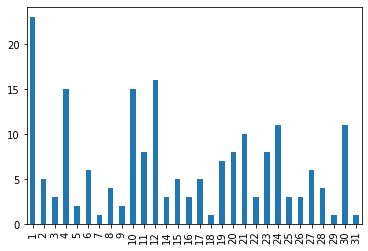

In [25]:
df_train_day=df_train.loc[df_train['FraudResult'] == 1, 'TransactionDay']
months_occurrences = df_train_day.value_counts()
months_occurrences = months_occurrences.sort_index()
graph_months = months_occurrences.plot.bar()

For the day of the transaction, we notice that the frauds are not concentrated on a specific period of the month, the days of fraud are distributed in a random way.

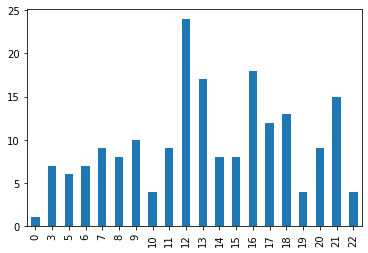

In [26]:
df_train_hour=df_train.loc[df_train['FraudResult'] == 1, 'TransactionHour']
months_occurrences = df_train_hour.value_counts()
months_occurrences = months_occurrences.sort_index()
graph_months = months_occurrences.plot.bar()

There are frauds at all hours of the day, frauds are not more concentrated at a specific time of the day so this column does not provide useful information for our model.

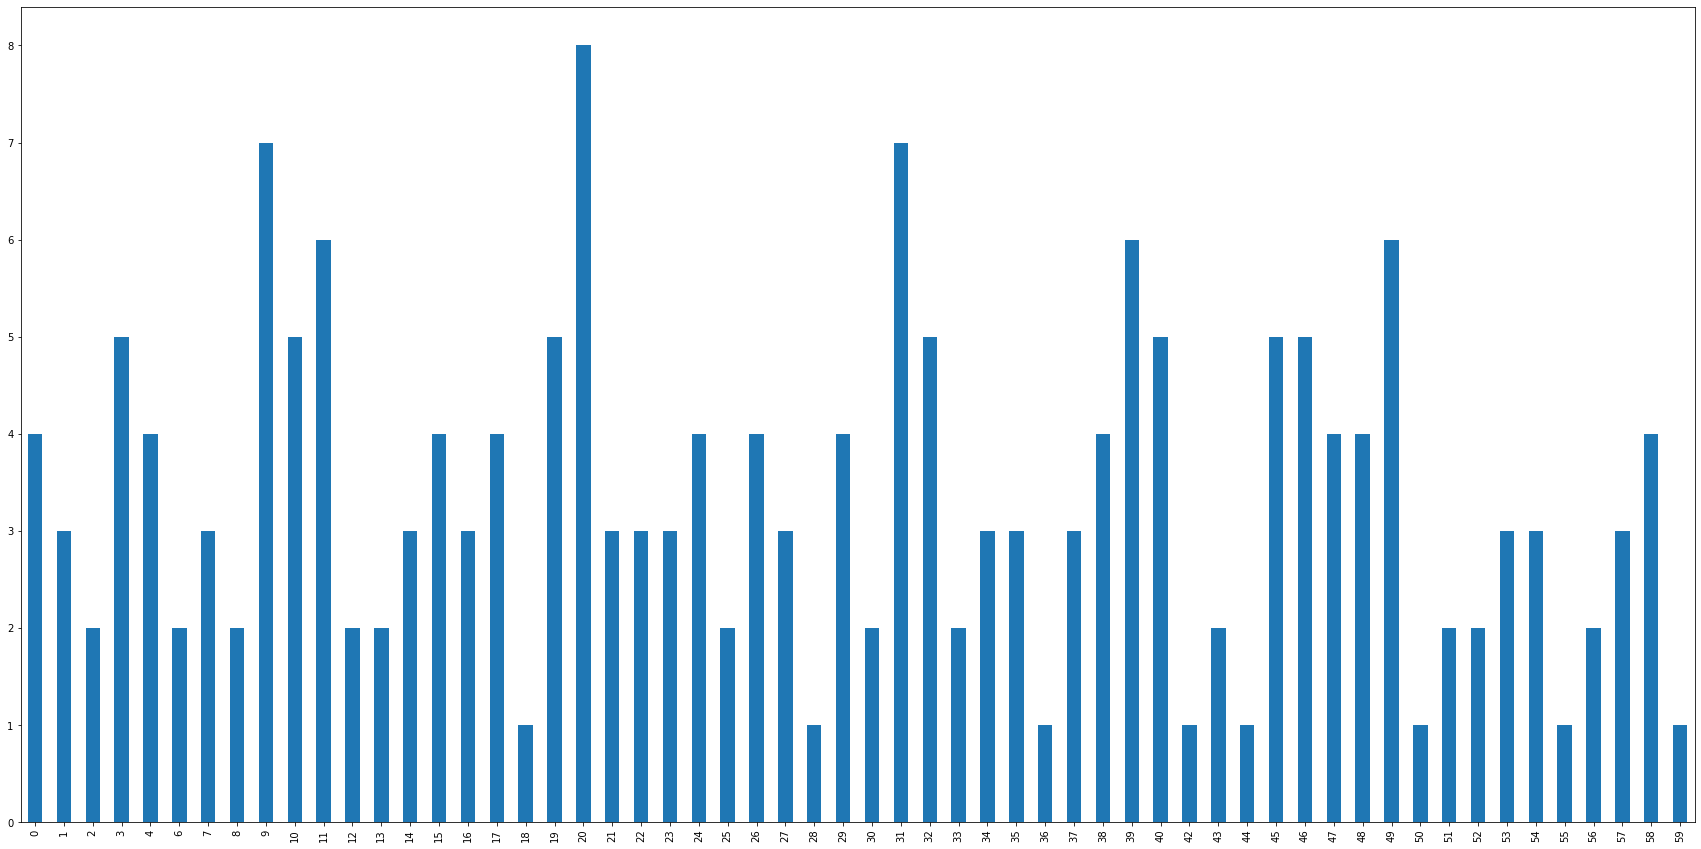

In [27]:
df_train_minute=df_train.loc[df_train['FraudResult'] == 1, 'TransactionMinute']
months_occurrences = df_train_minute.value_counts()
months_occurrences = months_occurrences.sort_index()
plt.figure(figsize=(30,15))
graph_months = months_occurrences.plot.bar()

The minutes of fraud are random, every minute is likely to have a fraud and there is not a time when frauds are much more likely than others, the transaction minute field is not meaningful for our model.


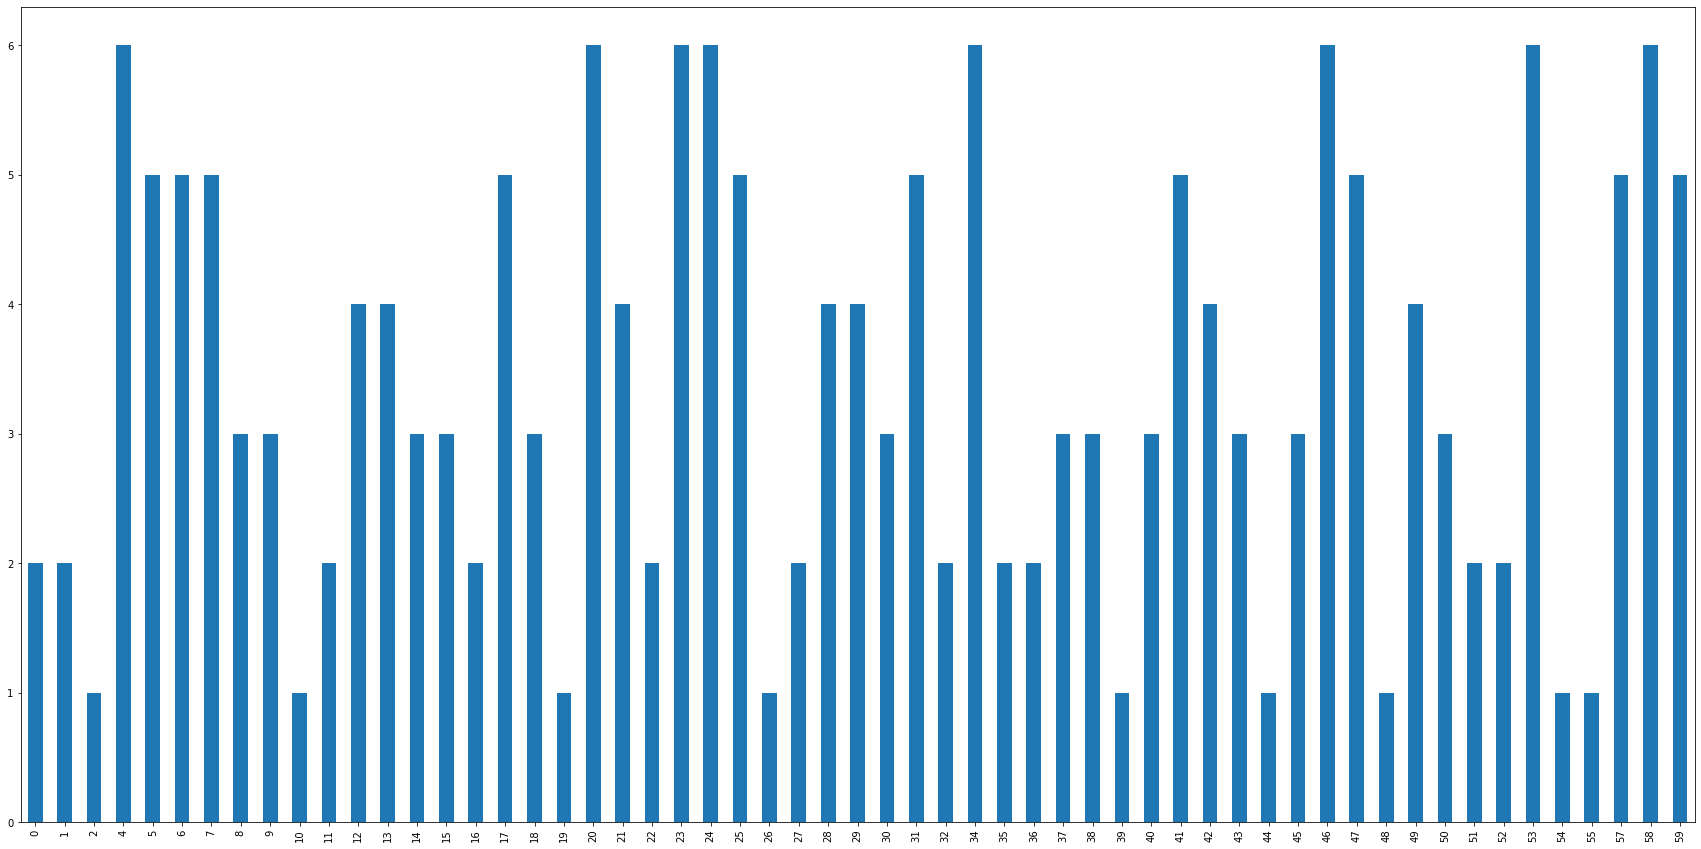

In [28]:
df_train_seconde=df_train.loc[df_train['FraudResult'] == 1, 'TransactionSeconde']
months_occurrences = df_train_seconde.value_counts()
months_occurrences = months_occurrences.sort_index()
plt.figure(figsize=(30,15))
graph_months = months_occurrences.plot.bar()

Every second is likely to have a fraud, there is no one moment of the minute where all the frauds are more concentrated than the others, the frauds are spread evenly over every moment of the minute.

In [29]:
df_train = df_train.drop(['TransactionYear'], axis= 1)
df_train = df_train.drop(['TransactionDay'], axis= 1)
df_train = df_train.drop(['TransactionHour'], axis= 1)
df_train = df_train.drop(['TransactionMinute'], axis= 1)
df_train = df_train.drop(['TransactionSeconde'], axis= 1)

In [30]:
df_test = df_test.drop(['TransactionYear'], axis= 1)
df_test = df_test.drop(['TransactionDay'], axis= 1)
df_test = df_test.drop(['TransactionHour'], axis= 1)
df_test = df_test.drop(['TransactionMinute'], axis= 1)
df_test = df_test.drop(['TransactionSeconde'], axis= 1)

### PricingStrategy

Let's now focus on another feature. If we check the 'PricingStrategy' column, we'll see that there are only 4 different values. This column represent the category of Xente's pricing structure for merchants (documentation). 

In [31]:
print(df_train['PricingStrategy'].unique())

[2 4 1 0]


In [32]:
df_train_pricing_strat=df_train.loc[df_train['FraudResult'] == 1, 'PricingStrategy']
print(df_train_pricing_strat.value_counts())
princing_strat_occurrences = df_train_pricing_strat.value_counts()

2    139
0     36
4     11
1      7
Name: PricingStrategy, dtype: int64


We can see that in the 'PricingStrategy' the strategy 2 and 0 are more likely to be Frauds. Let's plot the result to be more exhaustive.

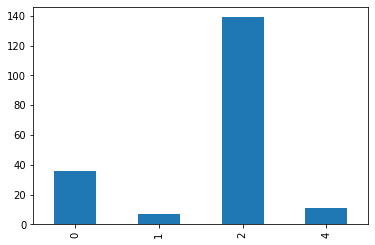

In [33]:
princing_strat_occurrences = princing_strat_occurrences.sort_index()
graph_pricing_strat = princing_strat_occurrences.plot.bar()

Therefore it would be a good choice to make a feature to signal to the model that the pricing strategy is a target variable. Indeed, it is easy to see that the fraud are committed more often with the strategy 2 and 0. In this case we'll neglect the 1 and 4 strategy in front of the values of our other strategies. 
To make it usable by our model, we'll use the Ordinal encoding method. But instead of replacing the 'PricingStrategy' column, we'll just add a new one with a value of '1' if the strategy is 0 or 2 and a value of '0' instead.

In [34]:
# df_train['SuspiciousStrategy'] = np.where((df_train['PricingStrategy'] == 0) | (df_train['PricingStrategy'] == 2), 1, 0)
# df_test['SuspiciousStrategy'] = np.where((df_test['PricingStrategy'] == 0) | (df_test['PricingStrategy'] == 2), 1, 0)

# treatment for the train dataset
train_conditions = [(df_train['PricingStrategy'] == 0), (df_train['PricingStrategy'] == 1), (df_train['PricingStrategy'] == 2), (df_train['PricingStrategy'] == 4)]
train_choices = [2, 0, 3, 1]
df_train['SuspiciousStrategy'] = np.select(train_conditions, train_choices, default=np.nan).astype(int)

# treatment for the test dataset
test_conditions = [(df_test['PricingStrategy'] == 0), (df_test['PricingStrategy'] == 1), (df_test['PricingStrategy'] == 2), (df_test['PricingStrategy'] == 4)]
test_choices = [2, 0, 3, 1]
df_test['SuspiciousStrategy'] = np.select(test_conditions, test_choices, default=np.nan).astype(int)

df_train = df_train.drop(['PricingStrategy'], axis=1)
df_test = df_test.drop(['PricingStrategy'], axis=1)


df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionMonth,SuspiciousMonth,SuspiciousStrategy
0,50600,35028,2441,4426,2857,5,3,airtime,3,1000.0,1000,2,1,1
1,95109,45139,3439,2643,3874,5,15,financial_services,3,2000.0,2000,2,1,3
2,47357,74887,4841,3829,2857,4,6,financial_services,2,-50.0,50,2,1,3
3,28185,11025,2685,4626,3105,5,10,airtime,3,3000.0,3000,2,1,1
4,22140,29804,4841,3829,3105,4,6,financial_services,2,-60.0,60,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,financial_services,3,-5000.0,5000,3,0,3
45015,24829,53630,4803,1738,5272,3,10,airtime,3,10000.0,10000,3,0,0
45016,102920,112209,4817,4613,5286,3,10,airtime,3,10000.0,10000,3,0,0
45017,128439,58734,4841,3829,5286,4,6,financial_services,3,-5000.0,5000,3,0,3


In [35]:
df_train['SuspiciousStrategy'].value_counts()

3    79848
1    13562
0     1867
2      385
Name: SuspiciousStrategy, dtype: int64

### Amount ( debits or credits)

If we check the 'Amount' column, we'll see that there are only  different values. This column represent the value of the transaction, positive for debits from customer account and negative for credits into customer account (documentation). 

In [36]:
print((df_train['Amount'] > 0).value_counts())

True     57473
False    38189
Name: Amount, dtype: int64


<BarContainer object of 2 artists>

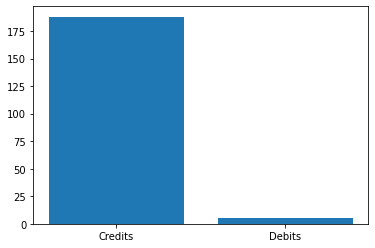

In [37]:
amount_values = df_train.loc[df_train['FraudResult'] == 1, 'Amount']
amount_occurrences = (amount_values > 0).value_counts()
plt.bar(["Credits", "Debits"], amount_occurrences)

Therefore it would be a good choice to make a feature to signal to the model that the type of payment is a target variable. Indeed, it is easy to see that the fraud are committed more often with the credit cards.
To make it usable by our model, we'll use the Ordinal encoding method. We'll replace the `Amount` column by a new one with only binary values : 1 if the `Amount` value is negative (credits) and 0 if the `Amount` value is positive (debits).

In [38]:
df_train['OldSuspiciousPayment'] = np.where((df_train['Amount'] < 0), 1, 0)
df_test['OldSuspiciousPayment'] = np.where((df_test['Amount'] < 0), 1, 0)

alpha = pd.get_dummies(df_train.OldSuspiciousPayment, prefix='Type_Payment_')
df_alpha = pd.DataFrame(alpha)
df_train['Debits'] = df_alpha.Type_Payment__0
df_train['Credits'] = df_alpha.Type_Payment__1

beta = pd.get_dummies(df_test.OldSuspiciousPayment, prefix='Type_Payment_')
df_beta = pd.DataFrame(beta)
df_test['Debits'] = df_beta.Type_Payment__0
df_test['Credits'] = df_beta.Type_Payment__1
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionMonth,SuspiciousMonth,SuspiciousStrategy,OldSuspiciousPayment,Debits,Credits
0,50600,35028,2441,4426,2857,5,3,airtime,3,1000.0,1000,2,1,1,0,1,0
1,95109,45139,3439,2643,3874,5,15,financial_services,3,2000.0,2000,2,1,3,0,1,0
2,47357,74887,4841,3829,2857,4,6,financial_services,2,-50.0,50,2,1,3,1,0,1
3,28185,11025,2685,4626,3105,5,10,airtime,3,3000.0,3000,2,1,1,0,1,0
4,22140,29804,4841,3829,3105,4,6,financial_services,2,-60.0,60,2,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,financial_services,3,-5000.0,5000,3,0,3,1,0,1
45015,24829,53630,4803,1738,5272,3,10,airtime,3,10000.0,10000,3,0,0,0,1,0
45016,102920,112209,4817,4613,5286,3,10,airtime,3,10000.0,10000,3,0,0,0,1,0
45017,128439,58734,4841,3829,5286,4,6,financial_services,3,-5000.0,5000,3,0,3,1,0,1


In [39]:
# Cleaning up intermediate column we used above to make the One-Hot Encoding

df_train = df_train.drop(['OldSuspiciousPayment'], axis= 1)
df_test = df_test.drop(['OldSuspiciousPayment'], axis= 1)

# Dropping the Amount column becasue we treated it

df_train = df_train.drop(['Amount'], axis= 1)
df_test = df_test.drop(['Amount'], axis= 1)

In [40]:
df_train = df_train.set_index('TransactionId')
df_test = df_test.set_index('TransactionId')

### Batch Id

In [41]:
# print(df_train['BatchId'].value_counts())
# print(df_train.index.value_counts())

test = df_train.loc[df_train['FraudResult'] == 1, 'BatchId']
print(test.value_counts())


126656    4
40160     2
32834     2
56782     2
7585      2
         ..
80911     1
21469     1
51734     1
1552      1
19378     1
Name: BatchId, Length: 183, dtype: int64


As we can see above, there's nothing that can help us to predict a fraud in the `BatchId` because there's 183 different values of `BatchId` that are frauds. Thus, there's no significant group of `BatchId` values. We can now drop the `BatchId` column.

In [42]:
df_train = df_train.drop(['BatchId'], axis= 1)
df_test = df_test.drop(['BatchId'], axis= 1)

In [43]:
df_test

,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,TransactionMonth,SuspiciousMonth,SuspiciousStrategy,Debits,Credits
TransactionId,,,,,,,,,,,,,
50600,2441,4426,2857,5,3,airtime,3,1000,2,1,1,1,0
95109,3439,2643,3874,5,15,financial_services,3,2000,2,1,3,1,0
47357,4841,3829,2857,4,6,financial_services,2,50,2,1,3,0,1
28185,2685,4626,3105,5,10,airtime,3,3000,2,1,1,1,0
22140,4841,3829,3105,4,6,financial_services,2,60,2,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116198,4841,3829,5225,4,6,financial_services,3,5000,3,0,3,0,1
24829,4803,1738,5272,3,10,airtime,3,10000,3,0,0,1,0
102920,4817,4613,5286,3,10,airtime,3,10000,3,0,0,1,0


### ChannelId

The `ChannelId` column identifies if customer used web, Android, IOS, pay later or checkout. If we look at the values of the `ChannelId` when the transactions are frauds, we can see that we get three group of `ChannelId` values.

Take into account that there are several values of `ChannelId` that are not present in the train set but are present in the test set.

In [44]:
print(df_train['ChannelId'].value_counts())

3    56935
2    37141
5     1048
1      538
Name: ChannelId, dtype: int64


In [45]:
print(df_test['ChannelId'].value_counts())

3    38090
2     6198
5      602
1      102
4       27
Name: ChannelId, dtype: int64


In [46]:
channel_values = df_train.loc[df_train['FraudResult'] == 1, 'ChannelId']
print(channel_values.value_counts())

3    184
2      5
1      4
Name: ChannelId, dtype: int64


<AxesSubplot:>

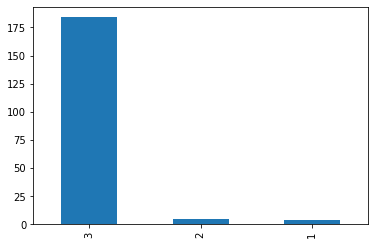

In [47]:
channel_values_occurences = channel_values.value_counts()
channel_values_occurences.plot.bar()

As we can see on the graph just above among the values of `ChannelId` that are frauds, the `ChannelId` with the value of 3 is clearly the one that comes out more often. It would be interesting to do a One-Hot Encoding method on it to 

In [48]:
# Doing the One-Hot Encoding on the ChennelId for the df_train (training set)
alpha = pd.get_dummies(df_train.ChannelId, prefix='ChannelId_')

df_alpha = pd.DataFrame(alpha)
df_alpha['ChannelId__4'] = 0
df_train['ChannelId__1'] = df_alpha['ChannelId__1']
df_train['ChannelId__2'] = df_alpha['ChannelId__2']
df_train['ChannelId__3'] = df_alpha['ChannelId__3']
df_train['ChannelId__4'] = df_alpha['ChannelId__4']
df_train['ChannelId__5'] = df_alpha['ChannelId__5']

# Doing the One-Hot Encoding on the ChennelId for the df_test (test set)
beta = pd.get_dummies(df_test.ChannelId, prefix='ChannelId_')

df_beta = pd.DataFrame(beta)
df_test['ChannelId__1'] = df_beta['ChannelId__1']
df_test['ChannelId__2'] = df_beta['ChannelId__2']
df_test['ChannelId__3'] = df_beta['ChannelId__3']
df_test['ChannelId__4'] = df_beta['ChannelId__4']
df_test['ChannelId__5'] = df_beta['ChannelId__5']

We can now drop the `ChannelId` column.

In [49]:
df_train = df_train.drop(['ChannelId'], axis= 1)
df_test = df_test.drop(['ChannelId'], axis= 1)

### AccountId

The `AccountId` is a unique number that is identifying the customer on the platform.

572     31
4421    22
1609    14
4003    12
1909     8
4687     7
4590     7
2656     7
1873     7
3337     6
Name: AccountId, dtype: int64


<AxesSubplot:>

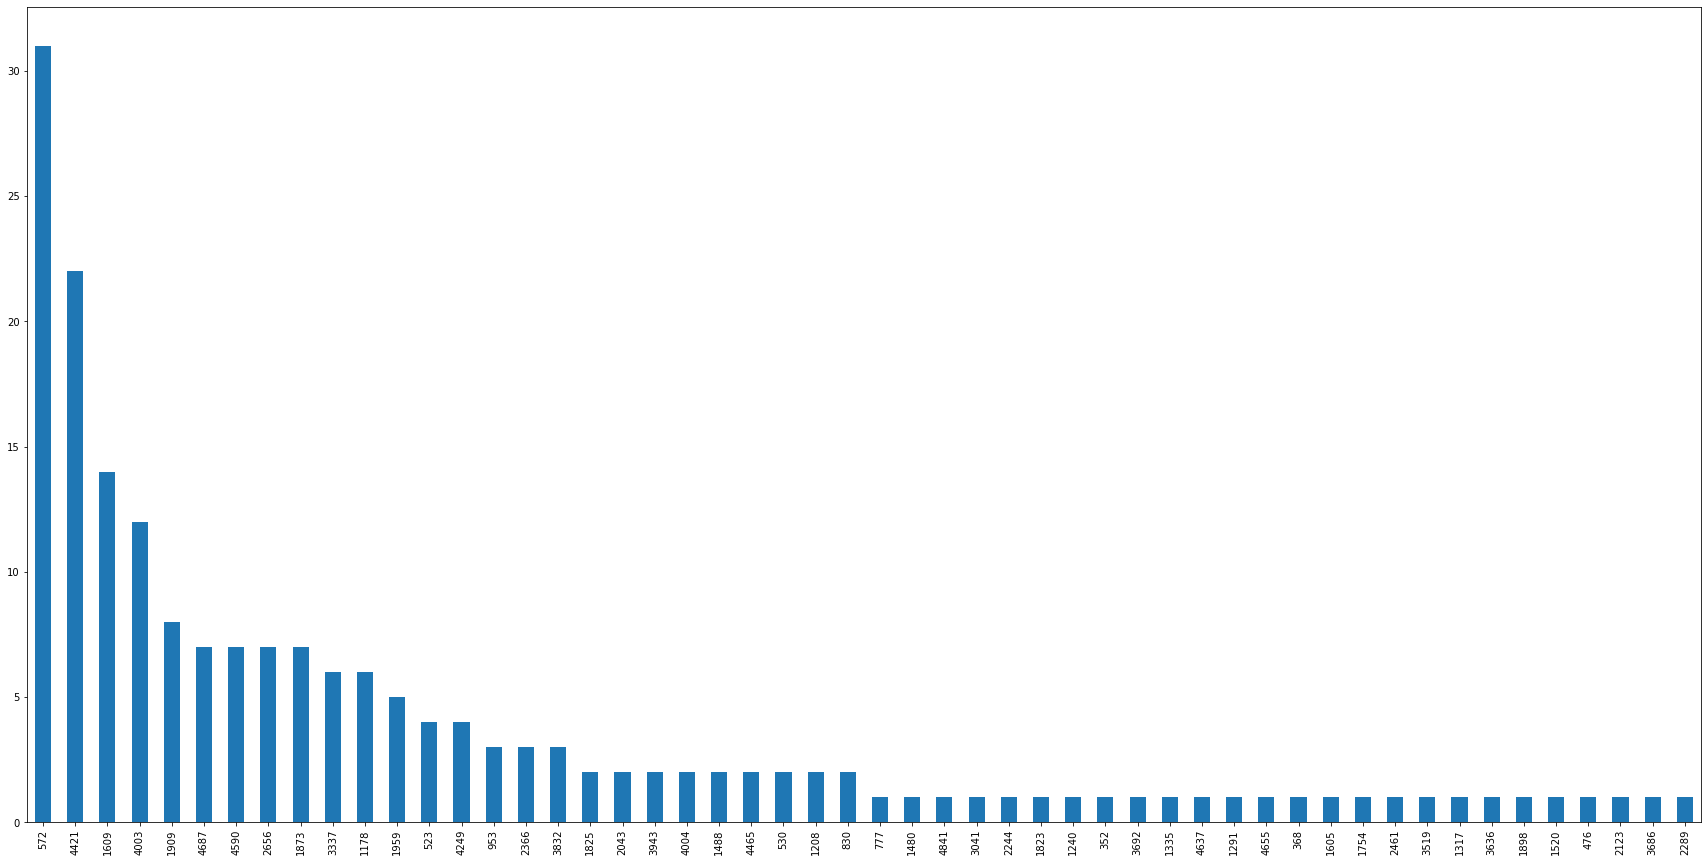

In [50]:
accountid_values = df_train.loc[df_train['FraudResult'] == 1, 'AccountId']
accountid_values_occurences = accountid_values.value_counts()

# printing a sample of the reccurent AccountId values that are frauds
print(accountid_values_occurences.head(10))

# plotting
plt.figure(figsize=(30,15))
accountid_values_occurences.plot.bar()

We can see that the more an `AccountId` value is present, the greater the risk of fraud.

Take that into account, it would be interesting to add a new column in our dataset that is counting the occurrences of the different `AccountId`.

But there's a problem with this idea because if we look at the entire dataset (training set) we'll see that there are `AccountId` values that are repeated more than 30 000 times and that are not frauds !! 

In [51]:
print(df_train['AccountId'].value_counts())

4841    30893
4249     4457
4840     1738
3206     1105
318      1070
        ...  
4180        1
63          1
3497        1
2010        1
1685        1
Name: AccountId, Length: 3633, dtype: int64


In this case it would be more interesting to just drop this column.

In [52]:
df_train = df_train.drop(['AccountId'], axis= 1)
df_test = df_test.drop(['AccountId'], axis= 1)

### SubscriptionId

The `SubscriptionId` is a unique value identifying the customer with a subscription number. But for the same reason as the `AccountId` we'll neglect it.

In [53]:
subscriptionid_values = df_train.loc[df_train['FraudResult'] == 1, 'SubscriptionId']
accountid_values_occurences = subscriptionid_values.value_counts()
print(accountid_values_occurences.head(10))

2950    31
4038    22
2872    14
3002    12
2496     8
4160     7
666      7
2912     7
2964     7
1252     6
Name: SubscriptionId, dtype: int64


In [54]:
print(df_train['SubscriptionId'].value_counts())

3829    32630
4429     4457
1372     1105
3087     1070
4346      965
        ...  
725         1
4781        1
2438        1
990         1
84          1
Name: SubscriptionId, Length: 3627, dtype: int64


In [55]:
df_train = df_train.drop(['SubscriptionId'], axis= 1)
df_test = df_test.drop(['SubscriptionId'], axis= 1)

### CustomerId

`CustomerId` is a unique identifier attached to an account. 

As we did for the `AccountId` and for the `SubscriptionId` we'll check the occurrences of `CustomerId` for the frauds.
There's nothing special to take out of that but if we look closely we can do something interesting by doing the sum of the `Value` for each `CustomerId` that are frauds.

In [56]:
# CustomerId that are frauds
customerid_values = df_train.loc[df_train['FraudResult'] == 1, 'CustomerId']

# occurrences of these customerid
customerid_values_occurences = customerid_values.value_counts()
print(customerid_values_occurences.sort_index())

682      1
698      1
806      1
856      4
865      3
909     31
1122     1
1175     2
1302     3
1535     6
1567     2
1602     1
1653     1
1680     1
1698     1
1850     1
1858     2
1891     1
1984     1
1988    14
2143     1
2214     1
2216     2
2266     7
2292     1
2303     8
2353     5
2445     2
2528     1
2656     1
2703     1
2877     1
3075     7
3467     1
3768     6
3956     1
4075     1
4128     1
4134     1
4275     3
4391     2
4453    12
4454     2
4878    22
4925     2
5054     7
5105     1
5123     1
5155     7
7339     2
7401     1
7414     2
7416     1
7429     1
Name: CustomerId, dtype: int64


Now let's calculate the sum of the `Value` by `CustomerId` that are frauds.

If you check just below, you'll see that the majority of the sum `Value` for each `CustomerId` that are frauds are very high values. But how do we know that they are high values ?

In [57]:
frauds = df_train[df_train['FraudResult'] == 1]
customerid_value_sum_frauds = frauds.groupby(by="CustomerId")['Value'].sum()
print(customerid_value_sum_frauds.sort_index())

CustomerId
682      1115000
698       500000
806       900000
856      3000000
865       501505
909     69390000
1122     1850000
1175     7500000
1302     7520000
1535    59116888
1567     1000000
1602     2000000
1653     1660000
1680      500000
1698      500000
1850     1509988
1858     2500000
1891     2000000
1984      540000
1988     1430000
2143      500000
2214      733000
2216     1088668
2266    13700000
2292     2800000
2303    13000000
2353     2960000
2445     9460000
2528      508000
2656      300000
2703      500000
2877      500000
3075     4224122
3467      500000
3768     2484000
3956     2000000
4075      500000
4128      800000
4134      700000
4275     2100000
4391     5500000
4453    22270000
4454     1060000
4878    20590000
4925     5500000
5054     3400000
5105      500000
5123      800000
5155    12510000
7339     1400000
7401      500000
7414     1630000
7416      880000
7429      500000
Name: Value, dtype: int64


To answer this question and to see if what we did above is relevant we're going to make a sum of all the `Value` ( on the train dataset) by `CustomerId`.

In [58]:
customerid_value_sum = df_train.groupby(by="CustomerId")['Value'].sum()
print(customerid_value_sum.sort_values(ascending=False))

CustomerId
7343    104900000
909      83480760
1535     60212748
4878     50912840
5155     29763180
          ...    
1918          500
1913          500
3375          300
1357          100
2635           50
Name: Value, Length: 3742, dtype: int64


We can already observe that most of the `CustomerId` with the highest sum on the `Value` are present in the frauds dataset !!!

Ex: 909, 1535, 4878, 5155, and so on...

But that doesn't show anything about the global `Value` by `CustomerId`. To know if the amount of the sum `Value` by `CustomerId` is high when they are frauds, we'll calculate the mean of the sum `Value` by `CustomerId`.

In [59]:
customerid_value_sum_mean = customerid_value_sum.values.mean()
print(customerid_value_sum_mean)

253102.5283270978


We can see that all the sum `Value` in the frauds are all higher than the mean.

In [60]:
print(customerid_value_sum_frauds.values > customerid_value_sum_mean)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


To take that into account in our model we'll do a Ordinal Encoding encoding on the `CustomerId` column.

In [61]:
customerid_value_sum = customerid_value_sum.to_frame()
customerid_value_sum['ValueSuperiorToMean'] = np.where(customerid_value_sum['Value'] > customerid_value_sum_mean, 1, 0)
print(customerid_value_sum)

             Value  ValueSuperiorToMean
CustomerId                             
1            10000                    0
2            10000                    0
3            10000                    0
4            10000                    0
5            10000                    0
...            ...                  ...
7475          6735                    0
7476        216342                    0
7477          2000                    0
7478           500                    0
7479           500                    0

[3742 rows x 2 columns]


In [62]:
print(customerid_value_sum['ValueSuperiorToMean'].value_counts())

0    3313
1     429
Name: ValueSuperiorToMean, dtype: int64


In [63]:
customer_id_train_over_mean = customerid_value_sum.index[customerid_value_sum['ValueSuperiorToMean'] == 1].to_frame()
print(customer_id_train_over_mean['CustomerId'])
df_train['CustomerValueOverMean'] = customer_id_train_over_mean['CustomerId'].isin(df_train['CustomerId'])
df_train['CustomerValueOverMean'] = df_train['CustomerValueOverMean'].fillna(0)
df_train['CustomerValueOverMean'] = df_train['CustomerValueOverMean'].astype(int)

CustomerId
323      323
328      328
334      334
335      335
341      341
        ... 
7416    7416
7418    7418
7429    7429
7450    7450
7452    7452
Name: CustomerId, Length: 429, dtype: int64


Now we'll do the same for the test set.

In [64]:
customerid_value_sum_test = df_test.groupby(by="CustomerId")['Value'].sum()
print(customerid_value_sum_test.sort_values(ascending=False))

CustomerId
634     24402510
4464    22198860
4463    13651800
514     10101000
5193     9500000
          ...   
4760         500
2583         500
325          500
3800         100
1172          50
Name: Value, Length: 5018, dtype: int64


In [65]:
customerid_value_sum_mean_test = customerid_value_sum_test.values.mean()
print(customerid_value_sum_mean_test)

92409.50259067357


In [66]:
customerid_value_sum_test = customerid_value_sum_test.to_frame()
customerid_value_sum_test['ValueSuperiorToMean'] = np.where(customerid_value_sum_test['Value'] > customerid_value_sum_mean_test, 1, 0)
print(customerid_value_sum_test)

             Value  ValueSuperiorToMean
CustomerId                             
16           30000                    0
17           30000                    0
18           30000                    0
19          100000                    1
20          100000                    1
...            ...                  ...
7424        400000                    1
7425        400000                    1
7426          6500                    0
7432         50000                    0
7449          1000                    0

[5018 rows x 2 columns]


In [67]:
customer_id_test_over_mean = customerid_value_sum_test.index[customerid_value_sum_test['ValueSuperiorToMean'] == 1].to_frame()
print(customer_id_test_over_mean['CustomerId'])
df_test['CustomerValueOverMean'] = customer_id_test_over_mean['CustomerId'].isin(df_test['CustomerId'])
df_test['CustomerValueOverMean'] = df_test['CustomerValueOverMean'].fillna(0)
df_test['CustomerValueOverMean'] = df_test['CustomerValueOverMean'].astype(int)

CustomerId
19        19
20        20
21        21
22        22
23        23
        ... 
7421    7421
7422    7422
7423    7423
7424    7424
7425    7425
Name: CustomerId, Length: 748, dtype: int64


In [68]:
df_test['CustomerValueOverMean'].value_counts()

0    44799
1      220
Name: CustomerValueOverMean, dtype: int64

Now we drop the `CustomerId` column.

In [69]:
df_train = df_train.drop(['CustomerId'], axis= 1)
df_test = df_test.drop(['CustomerId'], axis= 1)

In [70]:
y = df_train.FraudResult
df_train = df_train.drop(['FraudResult'], axis= 1)

## The model

Now as an example we'll use the DummyClassifier to always predict “not fraud” just to show how misleading accuracy can be.
The "train_test_split" function split arrays or matrices into random train and test subsets.
The DummyClassifier makes predictions that ignore the input features, this classifier serves as a simple baseline to compare against other more complex classifiers.

In [71]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9978257233651112


As explained in the documentation, a score of almost 99.8% without even training a model isn't a good indicator of what we did. This result is just telling us that there is 0.2% of the transactions that are frauds, but it's not predicting anything at all.

Also as we explained above, there's only a very little part of our samples that are frauds. To deal with this problem we'll use the oversampling method and using the SMOTE machine learning technique.

The SMOTE function takes several parameters but we'll only use one "random_state" and it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.


In [72]:
#Oversampling the data
smote = SMOTE(random_state = 101)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=27)

print("This is the samples before the oversampling : ")
print(y_train.value_counts())
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)


# dropping the 'ProductCategory' column because it contains strings
X = X.drop(['ProductCategory'], axis=1)
X_train = X_train.drop(['ProductCategory'], axis=1)
X_test = X_test.drop(['ProductCategory'], axis=1)

# separe the minority and majority classes
not_fraud = X[X.FraudResult==0]
fraud = X[X.FraudResult==1]


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("This is the samples after the oversampling : ")
print(y_train_sm.value_counts())

This is the samples before the oversampling : 
0    71605
1      141
Name: FraudResult, dtype: int64
This is the samples after the oversampling : 
0    71605
1    71605
Name: FraudResult, dtype: int64


In [73]:
# training model
rfc = RandomForestClassifier(n_estimators=100).fit(X_train_sm, y_train_sm)

# prdict on test set
rfc_pred = rfc.predict(X_test)

print(y_test.value_counts())
print(len(rfc_pred))

print(f1_score(y_test, rfc_pred))

0    23864
1       52
Name: FraudResult, dtype: int64
23916
0.7927927927927929


In [74]:
df_test = df_test.drop(['ProductCategory'], axis=1)
print(df_test.head(15))

               ProviderId  ProductId  Value  TransactionMonth  \
TransactionId                                                   
50600                   5          3   1000                 2   
95109                   5         15   2000                 2   
47357                   4          6     50                 2   
28185                   5         10   3000                 2   
22140                   4          6     60                 2   
134338                  6          3   1000                 2   
109096                  4          6     50                 2   
14249                   3          3   1000                 2   
69896                   4          6     50                 2   
91468                   3         14   1161                 2   
18862                   4          3   1000                 2   
29342                   5          3   1000                 2   
116873                  4          6     50                 2   
81197                   1

In [75]:
test_id = "TransactionId_"+df_test.index.astype(str)
predictions = rfc.predict(df_test)
data = {'TransactionId': test_id, 'FraudResult': predictions}
submission = pd.DataFrame(data)
submission.to_csv('sub.csv',index=False)